In [147]:
import numpy as np
import networkx as nx
import copy
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
def make_layered_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    size = N/community_number
    G = np.zeros((N, N))
    for i in range(N):
        com_index = i//size
        for j in range(N):
            if j <= size*(com_index+1) and j >= size*com_index:
                if i != j and np.random.rand() < average_degree*(1-2*mu)/(size-1):
                    G[i][j] = 1
            elif j >= size*(com_index-1) and j <= size*(com_index+2):
                if np.random.rand() < average_degree*mu/size:
                    G[i][j] = 1
                    
    return G

In [9]:
N_NODES = 200
mu = 0.1
G = make_layered_network(N_NODES, 15, 4, mu)

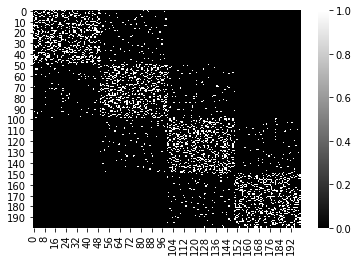

In [10]:
import seaborn as sns
sns.heatmap(G, cmap='gray')

In [11]:
def logistic_map(x, a):
    return 1-a*np.square(x)

In [12]:
def coupled_map_on_networks(x_t, G, epsilon, a, degrees_inv):
    x_t_1 = (1-epsilon)*logistic_map(x_t, a) + degrees_inv*epsilon*np.dot(G, logistic_map(x_t, a))
    return x_t_1

In [141]:
N_NODES = 200
mu = 0.1
G = make_layered_network(N_NODES, 15, 4, mu)
# G = np.ones((200, 200))

nx_G = nx.from_numpy_matrix(G, create_using=nx.MultiDiGraph())
degrees_inv = np.array([1/d for n, d in nx_G.out_degree()])
T = 5000
x = np.zeros((T, N_NODES))
x[0] = np.random.rand(N_NODES)*2-1
for t in range(T-1):
    x[t+1] = coupled_map_on_networks(x[t], G, 0.4, 1.75, degrees_inv)

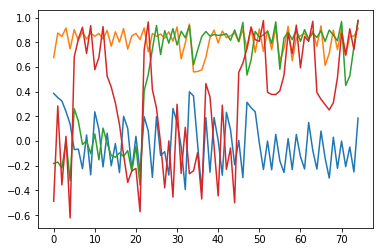

In [142]:
plt.plot(x.T[0][200:350:2])
plt.plot(x.T[50][200:350:2])
plt.plot(x.T[100][200:350:2])
plt.plot(x.T[150][200:350:2])

In [143]:
len(x.T[0])

5000

In [144]:
autocorrelation_list = np.zeros((50,N_NODES))
for i in range(N_NODES):
    for j in np.arange(0, 100, 2):
        autocorrelation_list[int(j/2)][i] = np.corrcoef(x.T[i][100+j:4500+j:2], x.T[i][100:4500:2])[0][1]


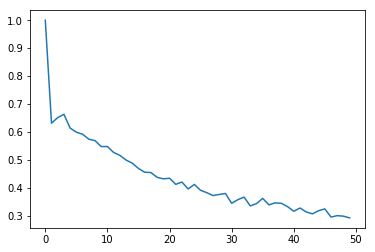

In [145]:
plt.plot(autocorrelation_list.T[10])

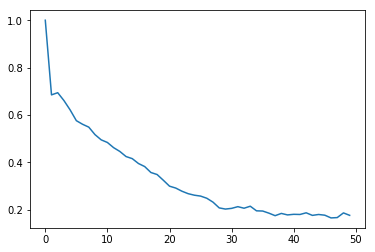

In [146]:
plt.plot(autocorrelation_list.T[152])

In [110]:
x = np.ones(10)
x**2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [134]:
A = nx.from_numpy_matrix(G,create_using=nx.MultiDiGraph())

In [146]:
degree_sequence = [d for n, d in A.out_degree()]
print(degree_sequence)

[11, 14, 19, 18, 17, 13, 11, 15, 12, 15, 12, 17, 10, 19, 13, 20, 11, 16, 13, 17, 13, 14, 9, 12, 19, 17, 16, 13, 10, 12, 8, 8, 13, 13, 13, 8, 13, 9, 8, 14, 10, 13, 15, 12, 7, 16, 10, 9, 12, 7, 10, 12, 19, 20, 16, 19, 16, 14, 20, 11, 21, 17, 13, 12, 15, 23, 10, 18, 13, 17, 20, 21, 10, 8, 16, 18, 11, 21, 13, 18, 17, 13, 12, 16, 14, 12, 16, 7, 21, 21, 12, 17, 17, 17, 14, 16, 19, 14, 18, 18, 18, 19, 15, 16, 21, 15, 15, 17, 16, 17, 13, 15, 20, 17, 16, 12, 10, 17, 13, 17, 20, 17, 16, 14, 14, 12, 13, 11, 18, 12, 9, 17, 20, 18, 14, 13, 18, 15, 11, 11, 16, 13, 11, 8, 13, 10, 13, 13, 11, 20, 16, 15, 11, 5, 9, 21, 9, 16, 12, 13, 14, 10, 11, 12, 12, 14, 15, 11, 12, 9, 12, 15, 9, 22, 13, 12, 8, 12, 15, 13, 11, 14, 13, 18, 17, 14, 12, 19, 10, 9, 14, 13, 16, 16, 8, 13, 15, 10, 13, 11]


In [147]:
print(G[0])

[0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [136]:
degree_sequence = sorted([d for n, d in A.out_degree()], reverse=True)
np.mean(degree_sequence)

14.065